# Bogolyubov approximation for diagonal model of an interacting Bose gas

$$
\rho_{0} = \frac{1}{V} \frac{\sum_{n=1}^\infty = ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}}{\sum_{n=0}^\infty = e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}} \sim (\frac{\mu - \lambda}{2 \gamma})
$$

### Observación parametros

__γ__,__β__ son parámetros positivos. 

$λ < µ < 0 $ y __V__ muy grande.

## *Desarrollo*

### Dependencias

In [83]:
import math
import matplotlib.pyplot as plt
import time
import sys

$$
\sum_{n=1}^\infty = ne^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [99]:
def f1(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(1, N):
        try:
            sumatoria+=n*math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
        
    return sumatoria

$$
V \sum_{n=0}^\infty = e^{\beta\{(- \lambda + \mu + \frac{\gamma}{V})n - \frac{\gamma}{V}n^{2}\}}
$$

In [98]:
def f2(b , u , lam , gam , v , N):
    sumatoria = 0
    
    for n in range(N):
        try:
            sumatoria+=math.exp(b*((-lam+u+(gam/v))*n-(gam/v)*math.pow(n, 2)))
        except OverflowError:
            print ("Desbordamiento")
            break
        
    resultado = v * sumatoria
    return resultado

### Obtención *validador*
$$
\frac{\mu - \lambda}{2 \gamma} 
$$

In [86]:
def validador(u , lam , gam):
    try:
        resultado = (u-lam)/(2*gam)
    except ZeroDivisionError:
        print('Division por cero')
        resultado = 0
        
    print ("Valor validador: ",resultado)    
    return resultado

### Obtención de *ρ*

In [87]:
def resultado(b , u , lam , gam , v , n):
    try:
        numerador =  f1(B, U, lam, gam, V, N)
        print ("Numerador: ",numerador)
        denominador = f2(B, U, lam, gam, V, N)
        print ("Denominador: ",denominador)
        ro = numerador/denominador
    except ZeroDivisionError:
        print('Division por cero')
        ro = 0
    print ("Valor ro: ",ro)
    return ro

### Graficador

In [88]:
def graficador(datos_x,datos_y,titulo,titulo_x,titulo_y):
    if (len(datos_x)!=0 or len(datos_y)!=0):
        
        # Informacion grafico
        plt.title(titulo)
        plt.xlabel(titulo_x)
        plt.ylabel(titulo_y)
        
        # Limites grafico
        minimo_x = min(datos_x) - 1
        maximo_X = max(datos_x) + 1
        minimo_y = min(datos_y) - 1
        maximo_y = max(datos_y) + 1
        plt.xlim(minimo_x,maximo_X)
        plt.ylim(minimo_y,maximo_y)
        
        # Mostrar datos
        plt.plot(datos_x, datos_y, 'ro')
        plt.show()
    else:
        print("Vector vacío")

### Prueba 1: Lambda variable (-2.3)

N:  0
Desbordamiento
Numerador:  1.9606378110872192e+297
Desbordamiento
Denominador:  8.91199005039652e+299
Valor ro:  0.002199999999999983
Valor validador:  0.0217



N:  1
Desbordamiento
Numerador:  2.2992170221554256e+300
Desbordamiento
Denominador:  8.84314239291253e+302
Valor ro:  0.002599999999997928
Valor validador:  0.018899999999999997



N:  2
Desbordamiento
Numerador:  6.552637470836849e+304
Desbordamiento
Denominador:  2.0476992098539723e+307
Valor ro:  0.003199999999660174
Valor validador:  0.016099999999999996



N:  3
Desbordamiento
Numerador:  inf
Desbordamiento
Denominador:  inf
Valor ro:  nan
Valor validador:  0.013299999999999996



N:  4
Desbordamiento
Numerador:  1.7585387917370296e+308
Desbordamiento
Denominador:  inf
Valor ro:  0.0
Valor validador:  0.010499999999999995



N:  5
Numerador:  2.1698934157612617e+198
Denominador:  2.7998624719500176e+200
Valor ro:  0.007749999999999993
Valor validador:  0.007699999999999996



N:  6
Numerador:  2.0673003342019905e+8

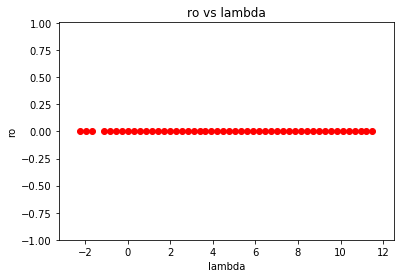

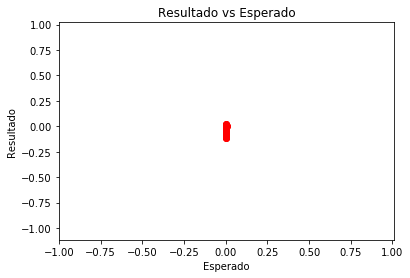

Tiempo ejecución:  0.43752002716064453 ms


In [101]:
# Valores iniciales
gam = 50      # Positivo
B = 15        # Positivo
lam = -2.5    # Menor que mu
U = -0.05     # Menor que cero
V = 10000     # Valor muy grande
N = 100       # Numero de iteraciones

# Datos grafico
titulo = "ro vs lambda"
nom_ejex= "lambda"
nom_ejey= "ro"


# Ejecucion prueba
start_time = time.time() #Para medir el tiempo de ejecución

numero_segmentaciones = 50.0

x = []
y = []
z = []

for i in range(int(numero_segmentaciones)):

    lam += 14/numero_segmentaciones
    
    print("N: ",i)
    ro = resultado(B ,U,lam,gam,V,N)
    y.append(ro)
    r = validador(U,lam,gam)
    z.append(r)    
    x.append(lam)
    
    print("\n\n")
    
print("Magnitud vector x: ",str(len(x)))
print("Magnitud vector y: ",str(len(y)))

graficador(x,y,titulo,nom_ejex,nom_ejey)
graficador(y,z,"Resultado vs Esperado","Esperado","Resultado")
print ("Tiempo ejecución: ",time.time() - start_time,"ms")

### Prueba 2: Lambda variable (-0.3)

N:  0
Numerador:  1.7593168074582547e+21
Denominador:  9.485479388940935e+23
Valor ro:  0.0018547473831522232
Valor validador:  0.0025
lambda:  -0.3



N:  1
Numerador:  6179017601.089272
Denominador:  4072360761655.767
Valor ro:  0.0015173060450020066
Valor validador:  0.0014999999999999996
lambda:  -0.19999999999999998



N:  2
Numerador:  345.0021118502665
Denominador:  619618.0705738559
Valor ro:  0.0005567980151559244
Valor validador:  0.0004999999999999998
lambda:  -0.09999999999999998



N:  3
Numerador:  1.174239760720691
Denominador:  17585.503321439945
Valor ro:  6.677316760613147e-05
Valor validador:  -0.0005000000000000003
lambda:  2.7755575615628914e-17



N:  4
Numerador:  0.12697830840517407
Denominador:  11157.60640229157
Valor ro:  1.1380425498706876e-05
Valor validador:  -0.0015000000000000002
lambda:  0.10000000000000003



N:  5
Numerador:  0.024495221188285315
Denominador:  10240.022097980269
Valor ro:  2.392106281989052e-06
Valor validador:  -0.0025000000000000005

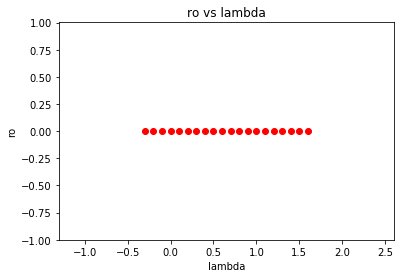

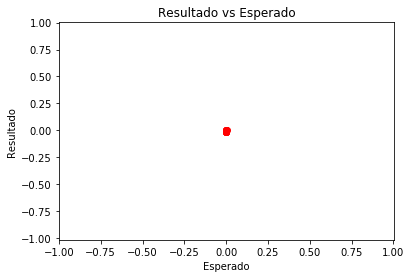

Tiempo ejecución:  0.4033021926879883 ms


In [90]:
# Valores iniciales
gam = 50      # Positivo
B = 15        # Positivo
lam = -0.3    # Menor que mu
U = -0.05     # Menor que cero
V = 10000     # Valor muy grande
N = 20        # Numero de iteraciones

# Paso variable 
aumento = 0.1

# Datos grafico
titulo = "ro vs lambda"
nom_ejex= "lambda"
nom_ejey= "ro"


# Ejecucion prueba
start_time = time.time() #Para medir el tiempo de ejecución

x = []
y = []
z = []

for i in range(N):
    print("N: ",i)
    ro = resultado(B ,U,lam,gam,V,N)
    y.append(ro)
    r = validador(U,lam,gam)
    z.append(r)    
    x.append(lam)
    print("lambda: ",lam)
    lam += aumento
    
    print("\n\n")
    
print("Magnitud vector x: ",str(len(x)))
print("Magnitud vector y: ",str(len(y)))

graficador(x,y,titulo,nom_ejex,nom_ejey)
graficador(y,z,"Resultado vs Esperado","Esperado","Resultado")
print ("Tiempo ejecución: ",time.time() - start_time,"ms")

### Pruebas internas

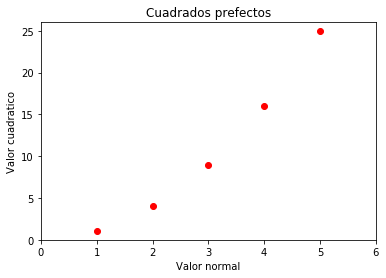

In [91]:
#Prueba de graficador
graficador([1,2,3,4,5],[1,4,9,16,25],"Cuadrados prefectos","Valor normal","Valor cuadratico")

In [92]:
def argumento(b , u , lam , gam , v , n):
    return b*((-lam+u+(gam/v))*n-(lam/v)*math.pow(n, 2))

In [93]:
result=argumento(B,U,lam,gam,V,N)
print (result)

-524.5200000000002


In [94]:
math.exp(result)

1.599036407710311e-228

In [95]:
math.log(sys.float_info.max)

709.782712893384

In [96]:
sys.float_info.max

1.7976931348623157e+308

In [97]:
math.exp(math.log(sys.float_info.max))

1.7976931348622732e+308

http://stackoverflow.com/questions/4050907/python-overflowerror-math-range-error

https://docs.python.org/3.6/library/math.html